## Testing our asymptotic approximations

In this notebook, I will be taking a few asymptotic expansion derived in lectures and the notes, and testing their accuracy.

As there is typically no way to symbolically evluate the integral we are approximating, for a reference we will use a high order quadrature approximation to the _true_ value of the integral, and compare against this.

## Taylor expansion


Recall the integral
$$I(x)=\int_0^x \frac{\sin(t)}{t} dt,\quad x\to0.$$
In lectures we derived an approximation
$$I(x) = x - \frac{x^3}{18} + \frac{x^5}{600} + O(x^7),\quad x\to0.$$

This example tests how well this works in practice. 

First we can code up three functions $\alpha_1,\alpha_2$ and $\alpha_3$, corresponding to the one, two and three term approximations respectively.

In [1]:
α₁(x) = x                    # + O(x^3)
α₂(x) = x - x^3/18           # + O(x^5)
α₃(x) = x - x^3/18 + x^5/600 # + O(x^7)

α₃ (generic function with 1 method)

Now define a high order quadrature approximation to $I(x)$, which we can compare our approximations $\alpha_n$ for $n\in\{1,2,3\}$ against:

In [2]:
using QuadGK
function I(x)
    f(t) = sin.(t)./t
    if x == 0 #have to account for special case to avoid division by zero
        I_ = [0.0]
    else
        I_ = quadgk(f,0.0,x)
    end
    return I_[1] #second argument is error estimate
end

I (generic function with 1 method)

Now define the relative error:
$$\epsilon_n := \left|\frac{I(x)-\alpha_n(x)}{I(x)}\right|,\quad\text{for }n\in\{1,2,3\}.$$

In [3]:
ϵ₁(x) = abs.(I.(x) - α₁.(x))./abs.(I.(x))
ϵ₂(x) = abs.(I.(x) - α₂.(x))./abs.(I.(x))
ϵ₃(x) = abs.(I.(x) - α₃.(x))./abs.(I.(x))

ϵ₃ (generic function with 1 method)

Now plot the error for a range of decreasing $x$

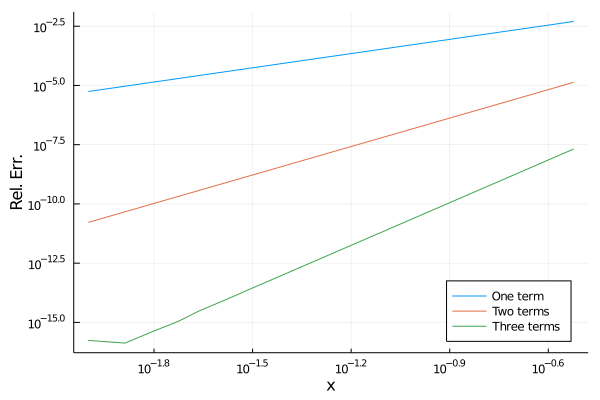

In [4]:
using Plots
X = range(0.01,0.3,length=100)
#X = 10 .^(range(-1.5,0,length=50))
plot(X,[ϵ₁(X) ϵ₂(X) ϵ₃(X)],yaxis=:log,xaxis=:log,legend=:bottomright,
    xlabel='x', ylabel="Rel. Err.",label = ["One term" "Two terms" "Three terms"])


## Integration by parts
Recall the approximation
$$
\int_0^1 t^{5/2}\sin(xt) dt = -\frac{\cos(x)}{x} + O(x^{-2}),\quad x\to\infty
$$


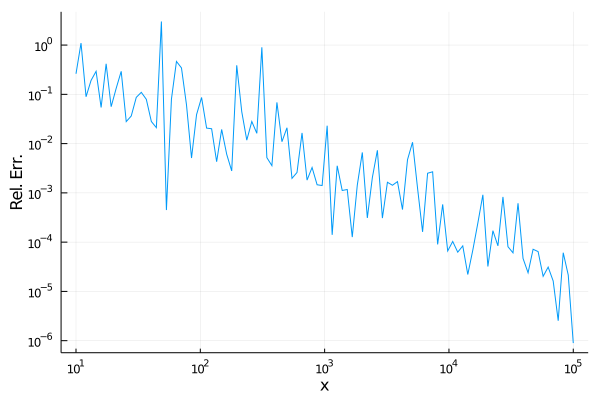

In [5]:
#Define a high order quadrature approximation to I
function I(x)
    f(t) = t.^(5/2) .* sin.(x*t)
    I_ = quadgk(f,0.0,1.0)
    return I_[1] #second argument is error estimate
end

#The asymptotic approximation:
α(x) = -cos(x)/x

#The error:
ϵ(x) = abs.(I.(x) - α.(x))./abs.(I.(x))

#Now plot the error for a range of large x:
X = 10 .^range(1,5,length=100)
plot(X,ϵ(X),yaxis=:log,xaxis=:log,legend=:false,
    xlabel='x', ylabel="Rel. Err.",)

## The Laplace method
Recall the example, using the general form of Laplace's method:
$$
\int_0^\pi(1+t)^{1/2}e^{x\cos t} dt\sim \frac{e^x\sqrt{\pi}}{\sqrt{2x}},\quad x\to\infty
$$

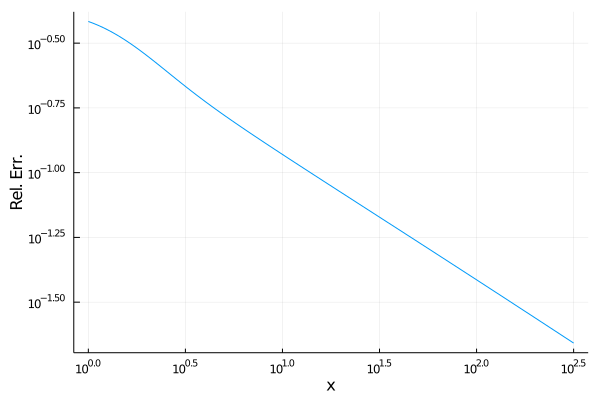

In [8]:
#Define a high order quadrature approximation to I
function I(x)
    f(t) = (1+t).^(1/2) .* exp.(x*cos(t))
    I_ = quadgk(f,0.0,π)
    return I_[1] #second argument is error estimate
end

#The asymptotic approximation:
α(x) = exp(x).*sqrt(pi/(2x))

#The error:
ϵ(x) = abs.(I.(x) - α.(x))./abs.(I.(x))

#Now plot the error for a range of large x:
X = 10 .^range(0,2.5,length=100)
plot(X,ϵ(X),yaxis=:log,xaxis=:log,legend=:false,
    xlabel='x', ylabel="Rel. Err.",)

Unfortunately - the quadrature routine for $I(x)$ runs out of memory for $x$ larger than we have tested here :/ It appears that our asymptotic approximation is on a good trajectory upto this point, and beyond this it can be used. And the fact that the quadrature approximation breaks down justifies the need for an asymptotic approximation :-)

## Stationary phase

Recall the approximation
$$
\int_0^2  \frac{e^{i x t}}{(1+t)^{1/2}} dt\sim \frac{1}{ix}
\left(
\frac{e^{2ix}}{\sqrt{3}} - 1
\right)
,\quad x\to\infty
$$

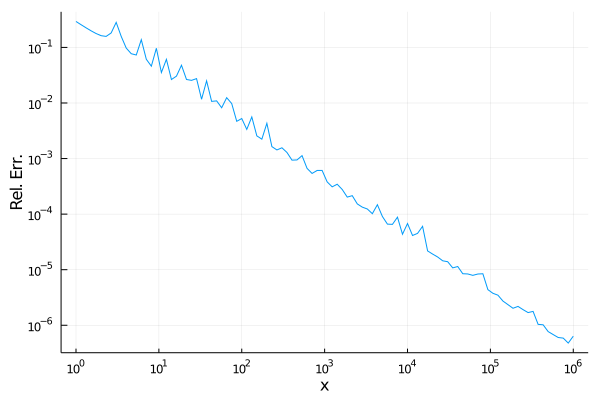

In [9]:
#Define a high order quadrature approximation to I
function I(x)
    f(t) = (1+t).^(-1/2) .* exp.(x*t*im)
    I_ = quadgk(f,0.0,2)
    return I_[1] #second argument is error estimate
end

#The asymptotic approximation:
α(x) = (exp(2im*x)/sqrt(3)-1)/(im*x)

#The error:
ϵ(x) = abs.(I.(x) - α.(x))./abs.(I.(x))

#Now plot the error for a range of large x:
X = 10 .^range(0,6,length=100)
plot(X,ϵ(X),yaxis=:log,xaxis=:log,legend=:false,
    xlabel='x', ylabel="Rel. Err.",)